In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("..")
import pickle
import pandas as pd
import numpy as np

from Performance_Evaluation_Framework.Explainable_Boosting_Machine import EBM
from Performance_Evaluation_Framework.Multidimensional_Performance_Indicator import DOS
from Results_Visualization.Visualization_Tools import Sensitivity_Analysis

### **1. Evaluation of Results**

In [2]:
dataset_description_index=0
true_binary_adjacency_index=1
estimated_adjacencies_index=4
fpr_metric='NoTears'

sample_sizes=['Large_Sample_Size']#,'Small_Sample_Size']
number_nodes=['10_nodes']#,'20_nodes','50_nodes','100_nodes']
model_names=['NoTears', 'Gran-DAG', 'GOLEM',
             'NoCurl', 'AVICI','DIRECT-LINGAM',
             'DAGMA', 'NoTears_Nonlinear',
             'R2SortnRegress', 'DAS', 'PC_stable',
            'fedtabu','pctabu','mmtabu']

metrics=['tpr','fpr','normalized_shd',
         'f1_score','causal_order_divergence','normalized_sid']
best_scenario=np.array([1.0,0.0,0.0,
                        1.0,0.0,0.0])
worst_scenario=np.array([0.0,1.0,1.0,
                         0.0,1.0,1.0])
parallelization=True
file_path='../Performance_Evaluation_Framework/Results/'

DOS_evaluation=DOS(dataset_description_index=dataset_description_index,
                true_binary_adjacency_index=true_binary_adjacency_index,
                estimated_adjacencies_index=estimated_adjacencies_index,
                fpr_metric=fpr_metric,
                sample_sizes=sample_sizes,
                number_nodes=number_nodes,
                model_names=model_names,
                metrics=metrics,
                best_scenario=best_scenario,
                worst_scenario=worst_scenario,
                read_path=file_path,
                read_file_names=['Causal_Discovery_Results_Demo_Evaluation.pkl'],
                #for all results replace with ['ER_CSL_Results.pkl','SF_CSL_Results.pkl'] 
                save_path=file_path,
                save_file_names=['Causal_Discovery_Results_Demo_Evaluation.pkl'])
                #for all results evaluations replace with ['ER_CSL_Results_Evaluation.pkl','SF_CSL_Results_Evaluation.pkl']

DOS_evaluation.evaluate()
DOS_evaluation.create_results_dataframe(save_results_frame_name='Results_Demo_Frame.pkl')

Current Sample Size:  Large_Sample_Size 

Current Number Nodes:  10_nodes 

- Current CSL Result Index:  1 from a total of  3
- Current CSL Result Index:  2 from a total of  3
- Current CSL Result Index:  3 from a total of  3


In [3]:
results_df=DOS_evaluation.results_dataframe

In [4]:
results_df

,Nr_Run,Nodes,Connectivity,Edges,Transformation_Function,Beta_Upper_Limit,Scale,Graph_Type,Sample_Size,CSL_Model,DOS,TPR,FPR,nSHD,FScore,DAG_Check,Eliminated_Edges,Causal_Order_Divergence,nSID
0,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,NoTears,1.000000,1.000000,0.000000,0.000000,1.000000,True,0,0.000000,0.000000
1,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,Gran-DAG,0.684478,0.416667,0.000000,0.411765,0.588235,True,0,0.000000,0.233333
2,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,GOLEM,1.000000,1.000000,0.000000,0.000000,1.000000,True,0,0.000000,0.000000
3,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,NoCurl,1.000000,1.000000,0.000000,0.000000,1.000000,True,0,0.000000,0.000000
4,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,AVICI,0.878164,0.833333,0.025641,0.125000,0.833333,True,0,0.083333,0.111111
5,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,DIRECT-LINGAM,0.733224,0.666667,0.064103,0.200000,0.640000,True,0,0.333333,0.233333
6,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,DAGMA,0.856450,0.833333,0.038462,0.120000,0.800000,True,0,0.166667,0.122222
7,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,NoTears_Nonlinear,0.904697,0.916667,0.038462,0.115385,0.846154,True,0,0.083333,0.055556
8,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,R2SortnRegress,0.933086,0.916667,0.012821,0.041667,0.916667,True,0,0.083333,0.066667
9,0,10,0.2,12,Linear_100%,1.0,original,ER,Large_Sample_Size,DAS,0.922215,0.916667,0.025641,0.120000,0.880000,True,0,0.000000,0.033333


In [ ]:
#pip install interpret-core[required,ebm]
with open('../Performance_Evaluation_Framework/Results/Avg_Number_Edges.pkl','rb') as f:
    avg_number_edges=pickle.load(f)
    
explainer=EBM(results_dataframe=results_df,avg_number_edges=avg_number_edges,
              dataset_characteristics=['Nodes', 'Connectivity', 'Transformation_Function',
                                       'Beta_Upper_Limit', 'Scale','Graph_Type','Sample_Size'],
              target_column='DOS',models_column='CSL_Model',graph_type_column='Graph_Type',
              connectivity_column='Connectivity',nodes_column='Nodes',save_path=file_path)
results_df=explainer.map_er_sf_connectivity()
explainer.estimate_EBM_scores()
ebm_explanations=explainer.ebm_explanations

### **2. Visualization of Results**

In [2]:
import pickle 
import numpy as np
import pandas as pd

with open('C:/Users/Georg Velev/Desktop/Humboldt Uni/CSL_Benchmark_Study/Exported_from_HU/Not_Aggregated/Raw_Nodes_Results/Six_Dimensional_DOS_Results/All_Results_Dos_Grouped_FPR_NoTears_CausalOrder_InterventionDistance.pkl','rb') as f:
    results_df=pickle.load(f)

#Otherwise done in the class EBM:
edge_density_k_mapping={'Nodes_10': {0.2: {'e': 10, 'd': 10, 'k': 1},
                                      0.3: {'e': 13, 'd': 10, 'k': 2},
                                      0.4: {'e': 18, 'd': 10, 'k': 3}},
                        'Nodes_20': {0.2: {'e': 38, 'd': 20, 'k': 2},
                                      0.3: {'e': 58, 'd': 20, 'k': 3},
                                      0.4: {'e': 77, 'd': 20, 'k': 4}},
                        'Nodes_50': {0.2: {'e': 245, 'd': 50, 'k': 5},
                                      0.3: {'e': 367, 'd': 50, 'k': 8},
                                      0.4: {'e': 489, 'd': 50, 'k': 10}},
                        'Nodes_100': {0.2: {'e': 992, 'd': 100, 'k': 10},
                                      0.3: {'e': 1485, 'd': 100, 'k': 15},
                                      0.4: {'e': 1978, 'd': 100, 'k': 20}}}

mapped_connectivity=[]
for row_idx in range(0,results_df.shape[0]):
    current_graph_type=results_df.iloc[row_idx,:]['Graph_Type']
    current_connectivity=results_df.iloc[row_idx,:]['Connectivity']
    if current_graph_type=='ER':#no overwriting of connectivity as already means edge density in %
        mapped_connectivity.append(current_connectivity)
    else:
        current_number_nodes=results_df.iloc[row_idx,:]['Nodes']
        nodes_mapping=edge_density_k_mapping['Nodes_'+str(current_number_nodes)]
        if nodes_mapping[0.2]['k']==current_connectivity:
            mapped_connectivity.append(0.2)
        elif nodes_mapping[0.3]['k']==current_connectivity:
            mapped_connectivity.append(0.3)
        else:
            mapped_connectivity.append(0.4)
results_df['Connectivity']=np.array(mapped_connectivity)


with open('C:/Users/Georg Velev/Desktop/Humboldt Uni/CSL_Benchmark_Study/Exported_from_HU/Not_Aggregated/Raw_Nodes_Results/Six_Dimensional_DOS_Results/EBM_COD_SID_single_run.pkl','rb') as f:
    ebm_explanations=pickle.load(f)

ebm_frames_merge=[]
for model_key in ebm_explanations.keys():
  model_frame=ebm_explanations[model_key]
  model_frame['CSL_Model']=model_key
  ebm_frames_merge.append(model_frame)
ebm_explanations=pd.concat(ebm_frames_merge)



In [3]:
ebm_explanations["CSL_Model"]=np.where(ebm_explanations["CSL_Model"]=="NoTears_Nonlinear","NoTears_MLP",ebm_explanations["CSL_Model"])
results_df["CSL_Model"]=np.where(results_df["CSL_Model"]=="NoTears_Nonlinear","NoTears_MLP",
                                        results_df["CSL_Model"])

In [4]:
results_visualization=Sensitivity_Analysis(ebm_explanations=ebm_explanations,
                                          results_df=results_df,
                                          ebm_threshold=0.01,
                                          read_path='../Performance_Evaluation_Framework/Results/')

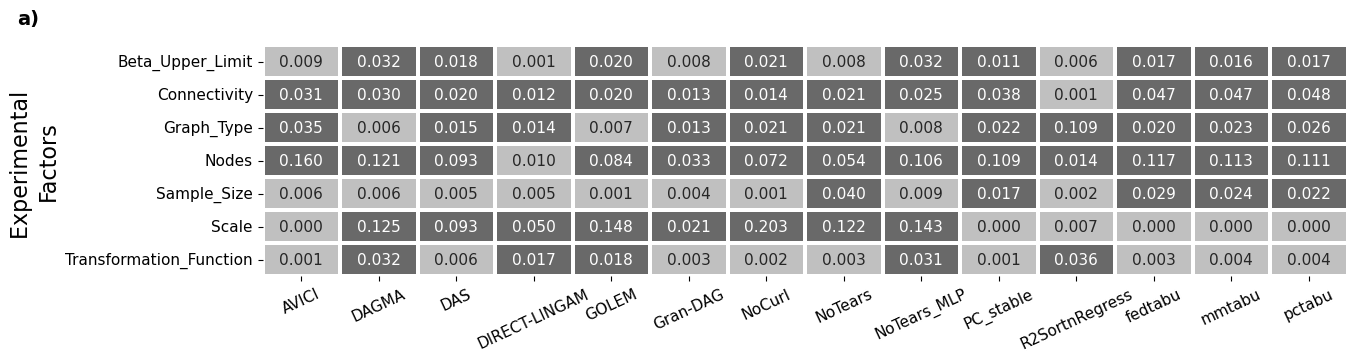

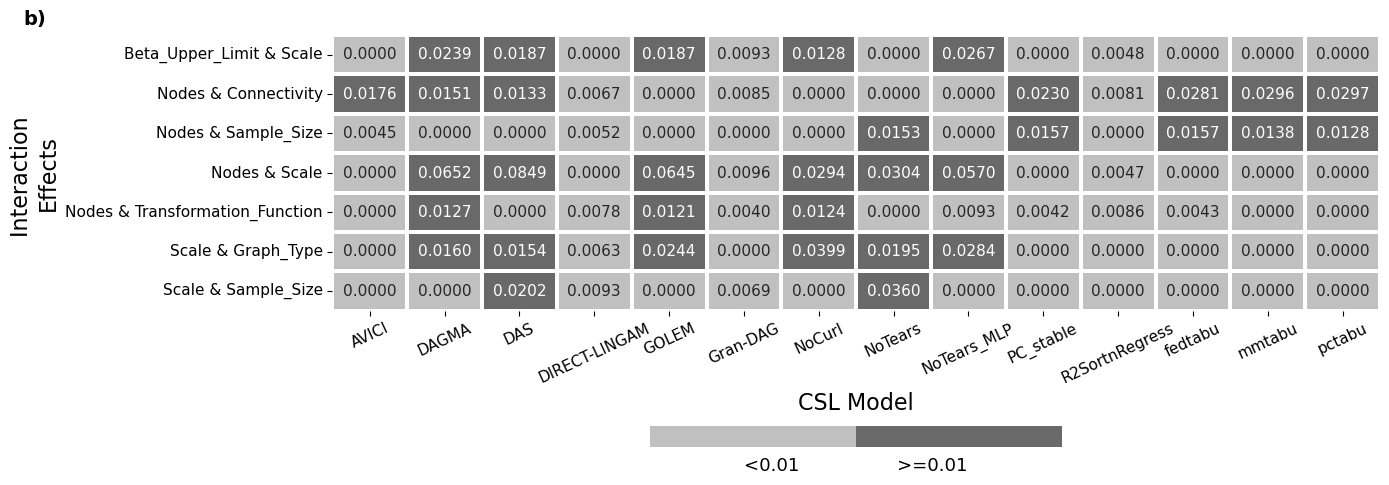

	Figure Caption: a) Importance Scores for experimental factors included in the simulation framework, 
 			b) EBM scores for estimated interaction effects.


In [5]:
results_visualization.plot_ebm_importance_interaction_scores()

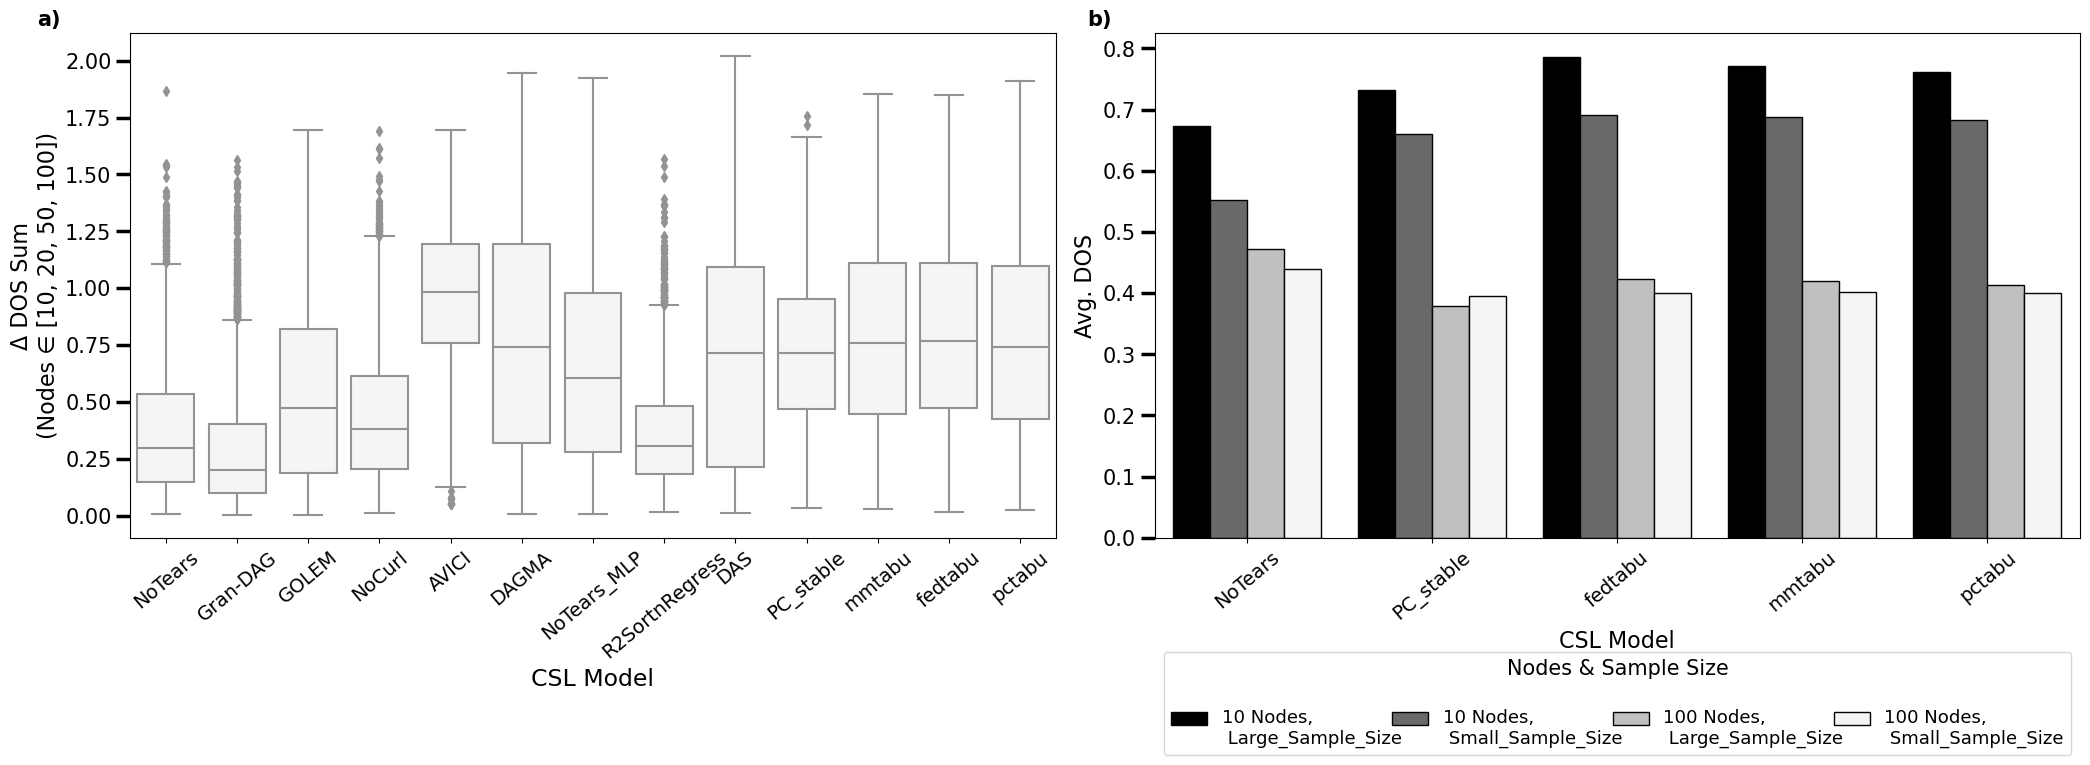

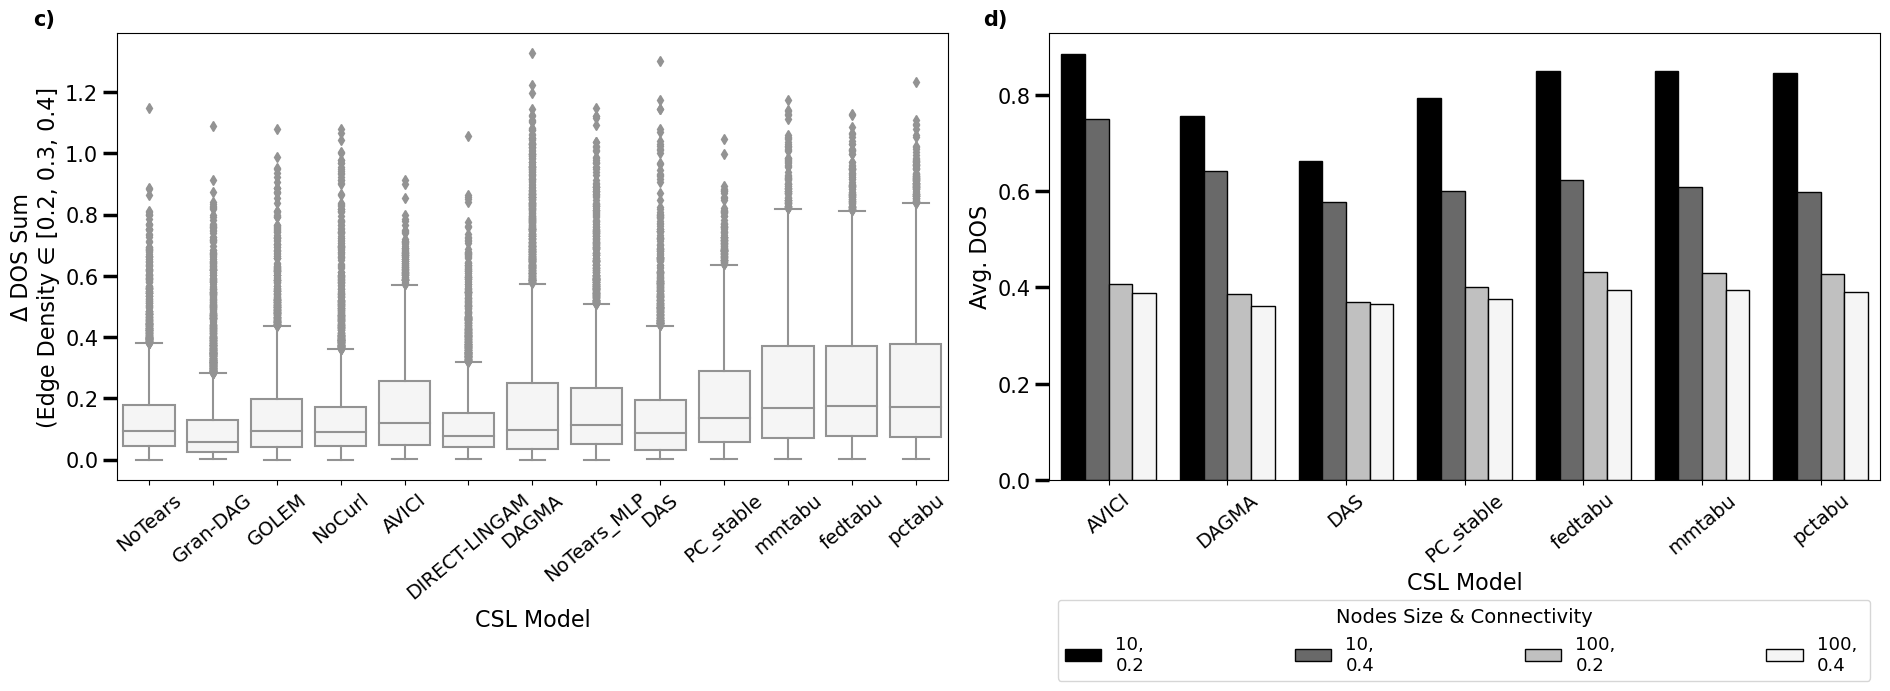

	Figure Caption: a) & c) Sensitivity w.r.t. node size and connectivity, 
 			b) & d) EBM interaction effects of node size with sample size & connectivity, respectivelly.


In [70]:
results_visualization.plot_nodes_connectivity()

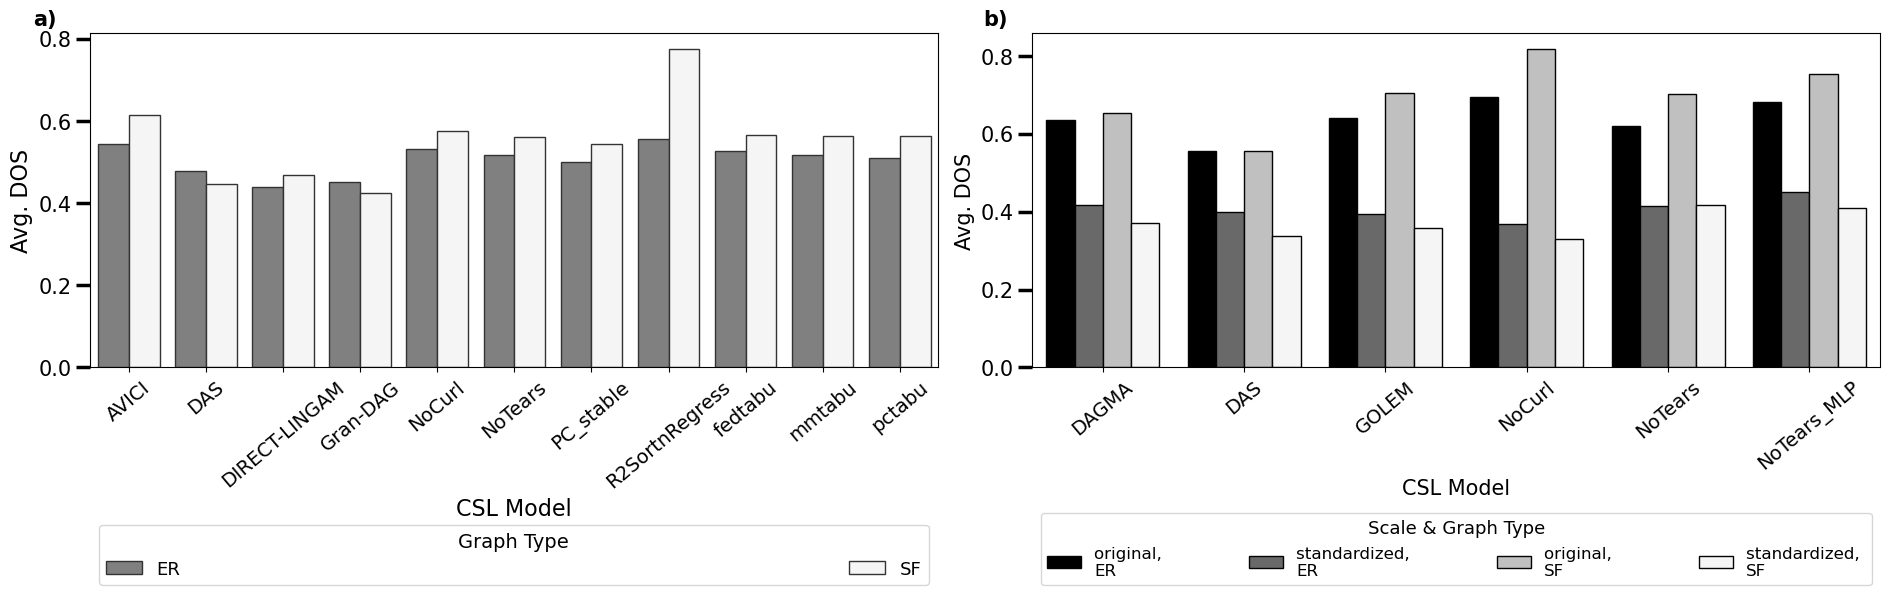

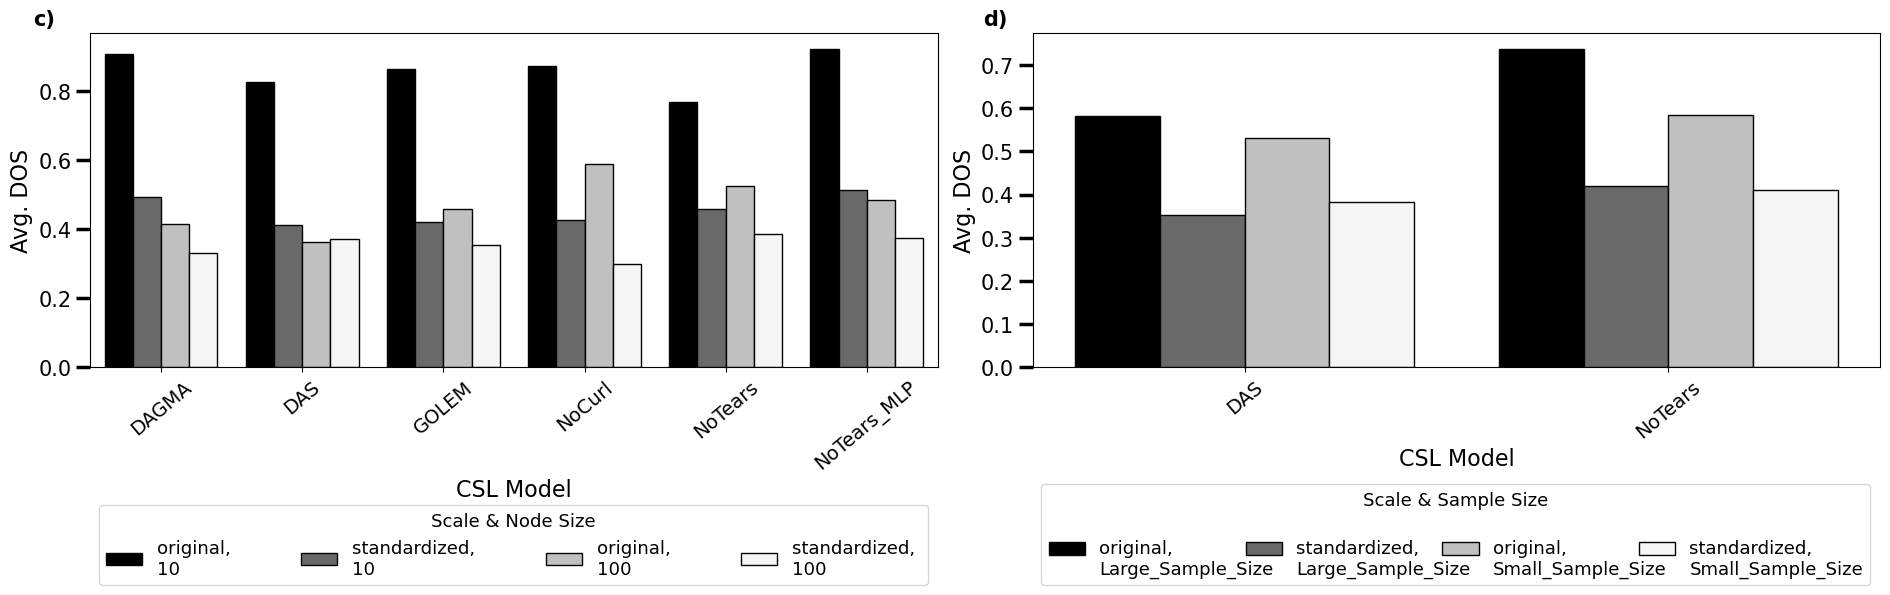

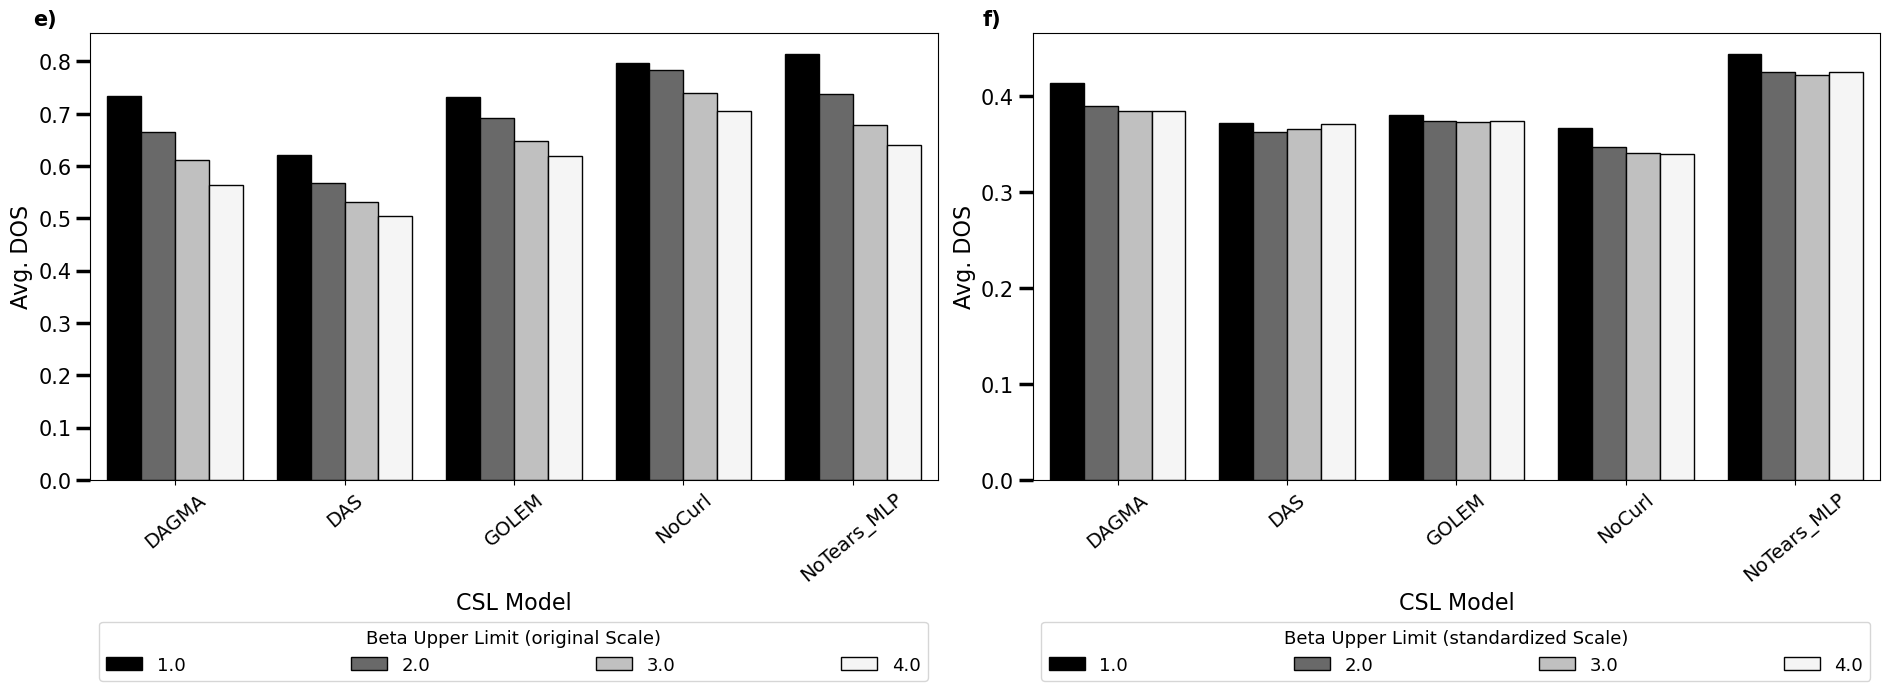

	Figure Caption: a) Sensitivity w.r.t. graph type, 
 			b), c) & d) EBM interaction effects of scale with graph type, node size and sample size, 
 			respectivelly,  
 			e) & f) Sensitivity w.r.t. beta upper limit on original and standardized scale, respectivelly. 


In [75]:
results_visualization.plot_interaction_effects_scale()

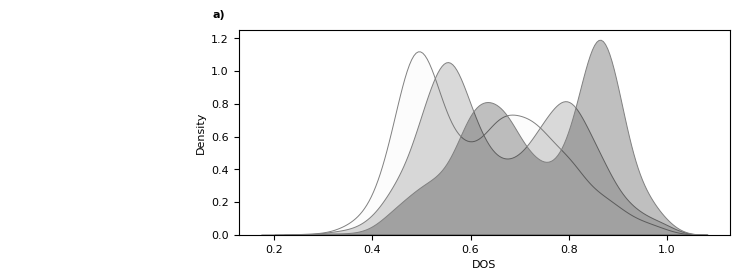

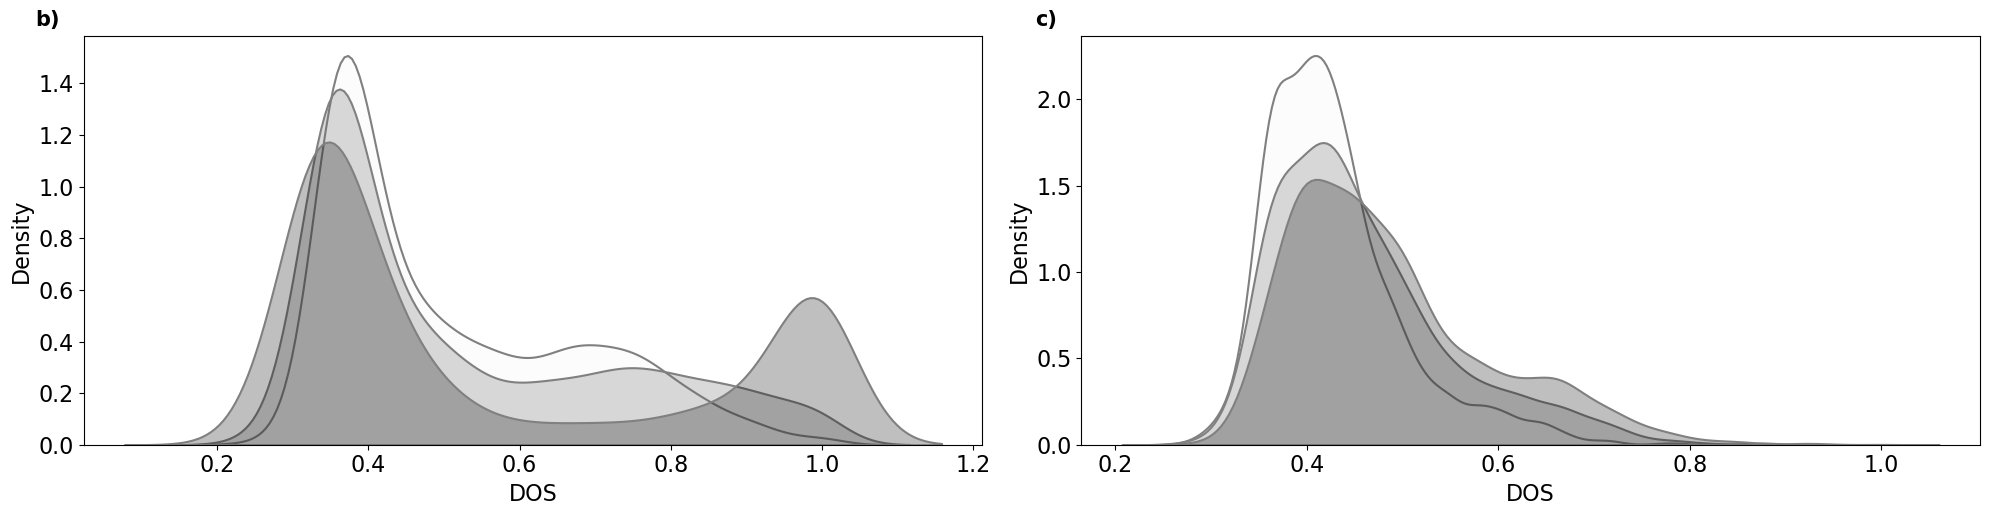

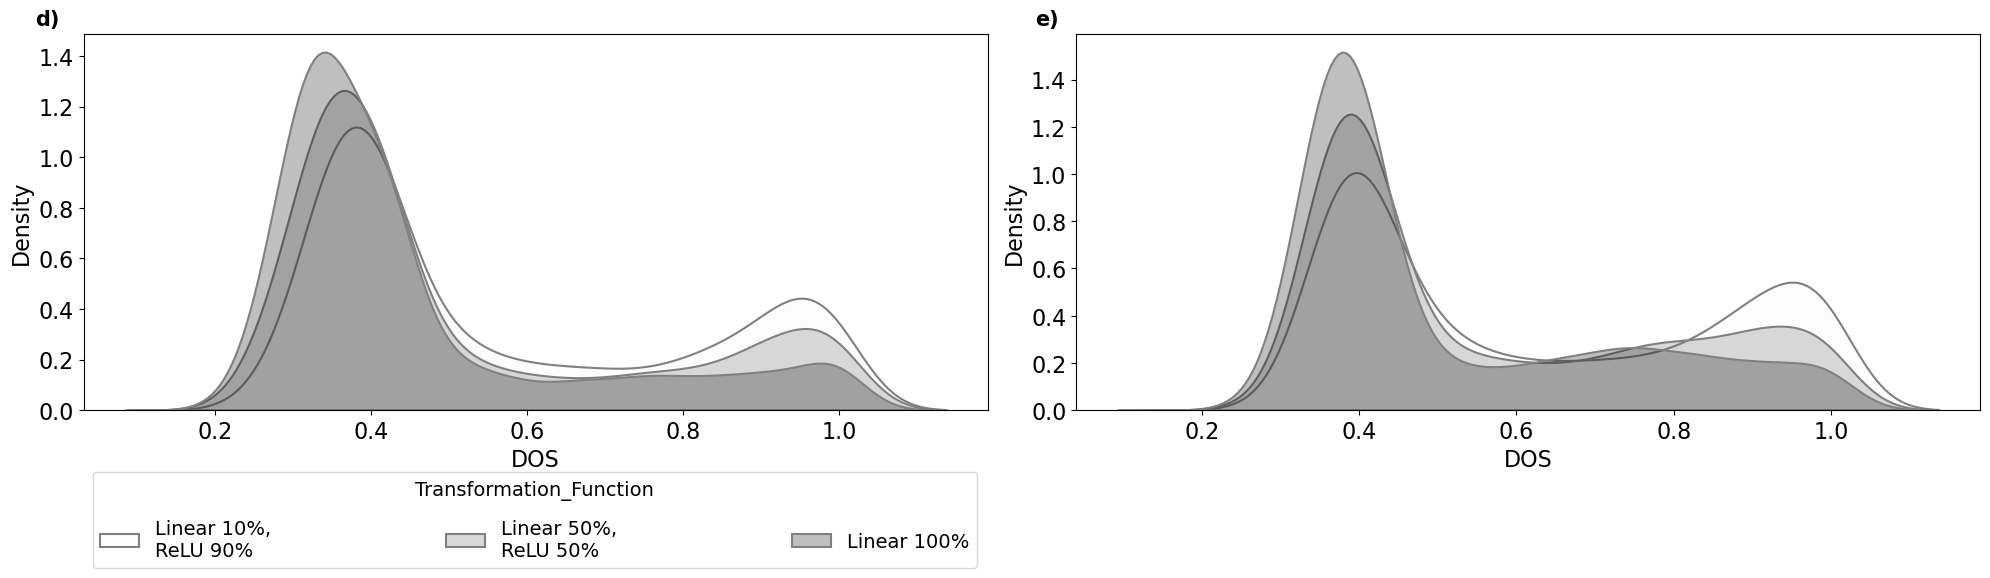

	Figure Caption: Sensitivity w.r.t. nonlinear, nonidentifiable causal transformations for 
 			a), b), c), d) & e) R2SortnRegress, GOLEM, DIRECT-LINGAM, DAGMA and NoTears_MLP, respectively. 


In [6]:
results_visualization.plot_transformation_function()

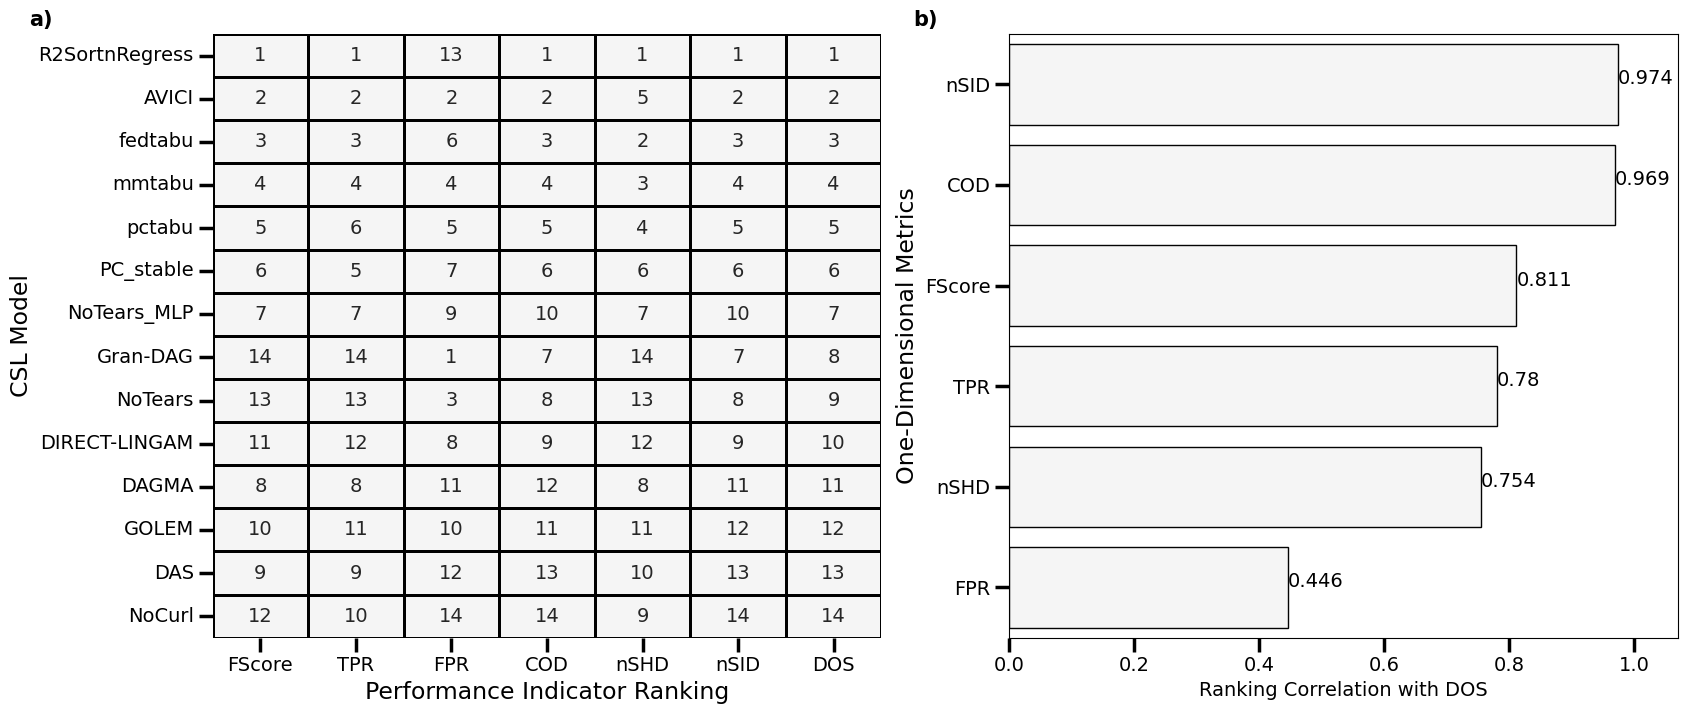

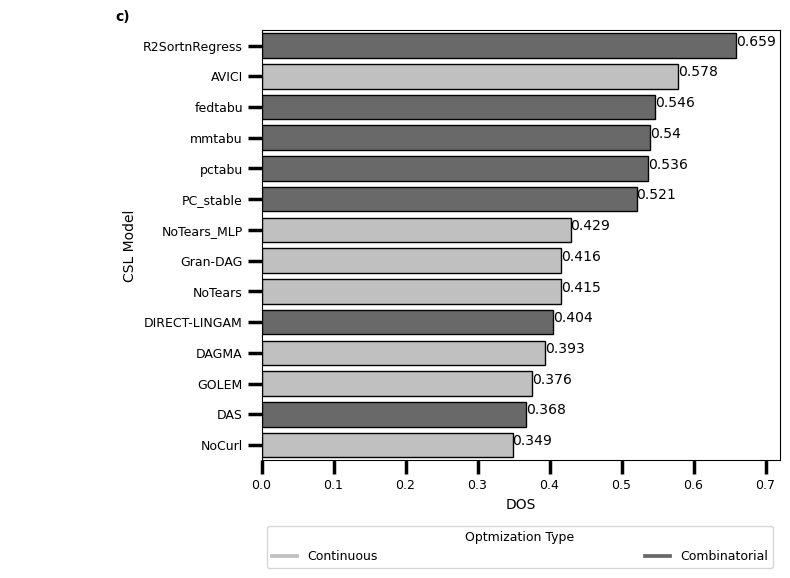

	Figure Caption: a) Ranking based on each one-dimensional criterion as well as DOS, 
 			 b) Ranking correlation of one-dimnesional metrics with DOS, 
 			 c) DOS performance on avg. achieved on standardized data.


In [7]:
results_visualization.plot_ranking_summary()

**Visualizations included in the Appendix of our study**

Impact of Beta Upper Limit on DAG-ness of inferred graphs and estimated number of edges:


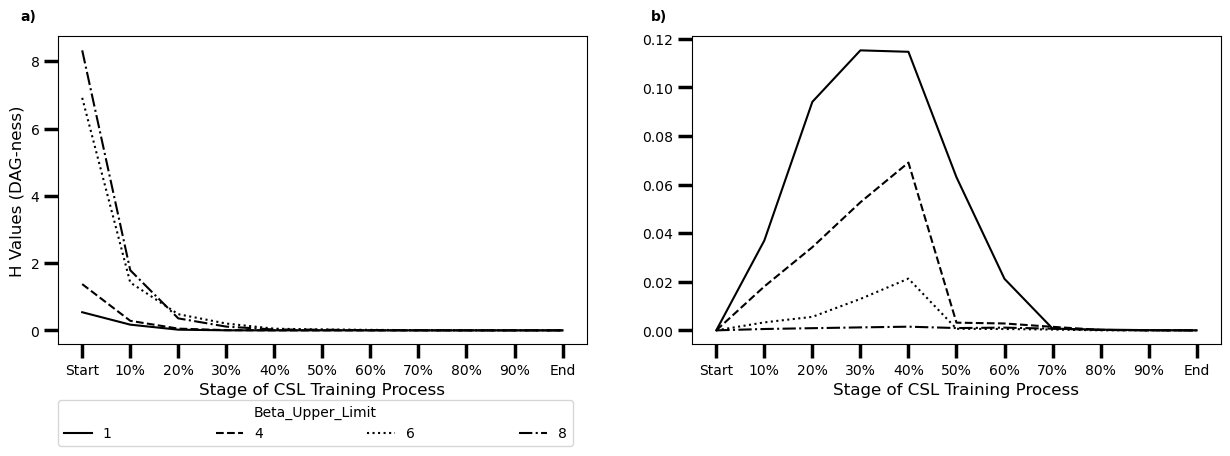

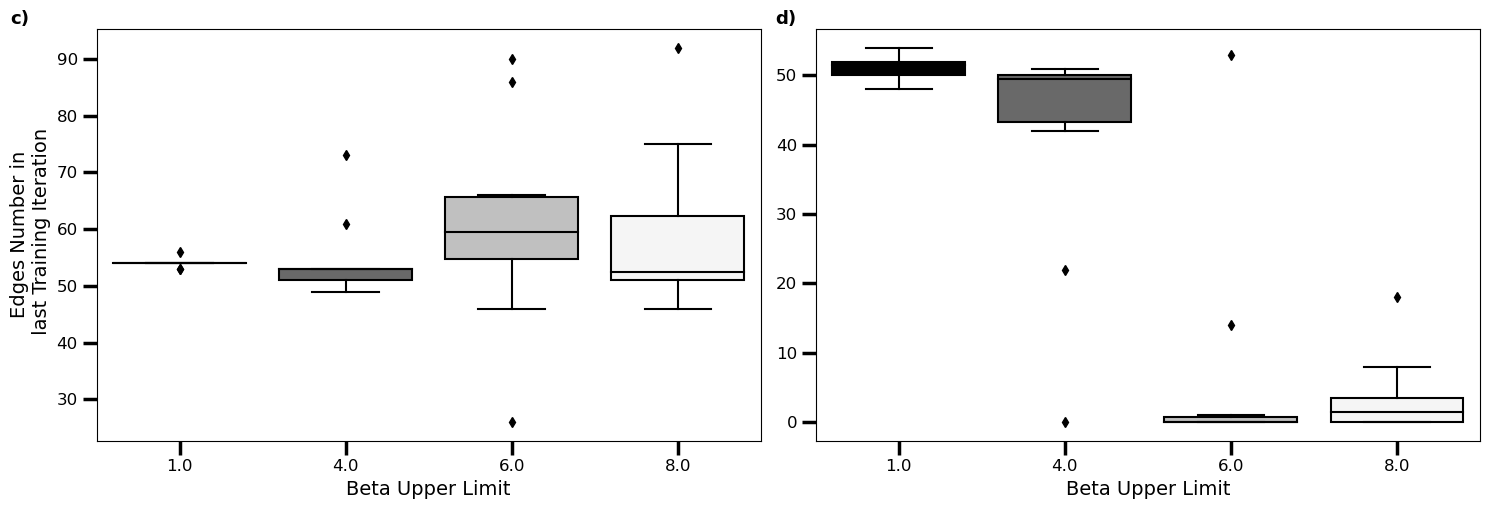

	Figure Caption: a) & b) DAG-ness of the estimated adjacency matrices in different stages of the models training 
 			of NoTears-MLP and DAGMA, respectivelly, 
 			 c) & d) Number of estimated edges at the end of the training process of NoTears-MLP and DAGMA,
 			 respecitvelly.


In [6]:
print('Impact of Beta Upper Limit on DAG-ness of inferred graphs and estimated number of edges:')
results_visualization.plot_appendix_additional_betas()

Selection of EBM Threshold:


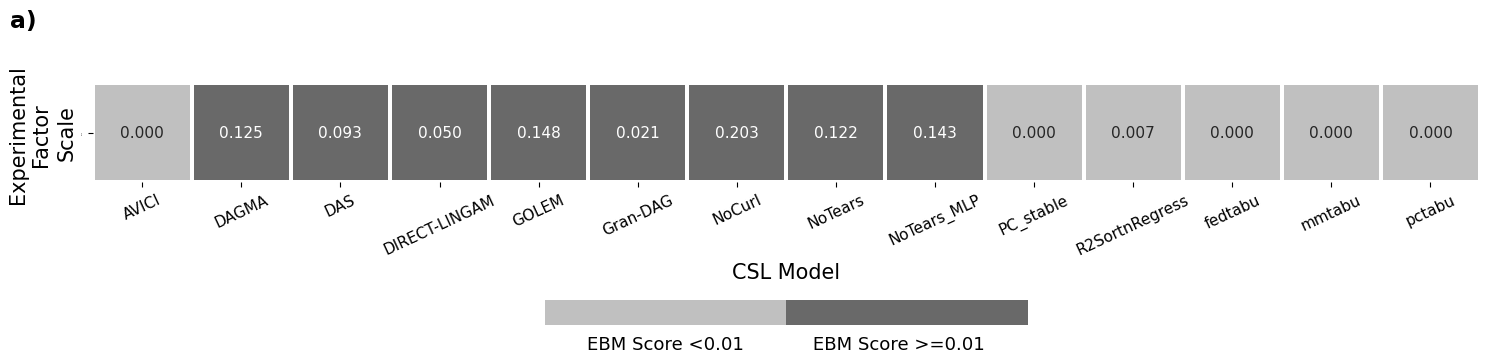

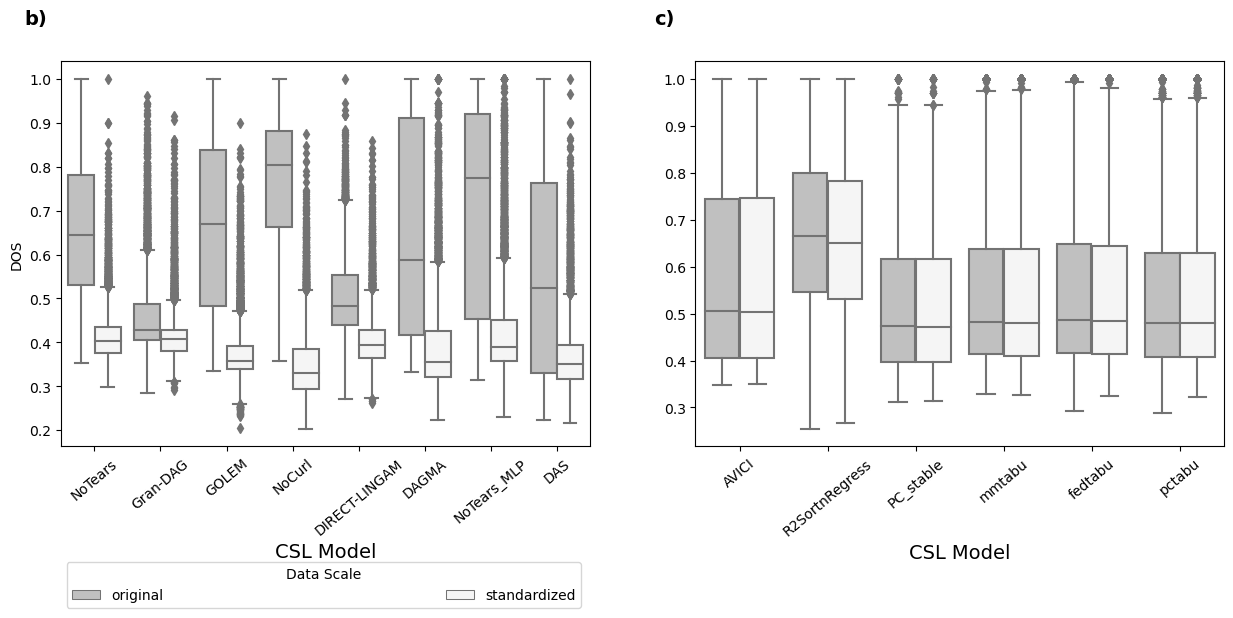

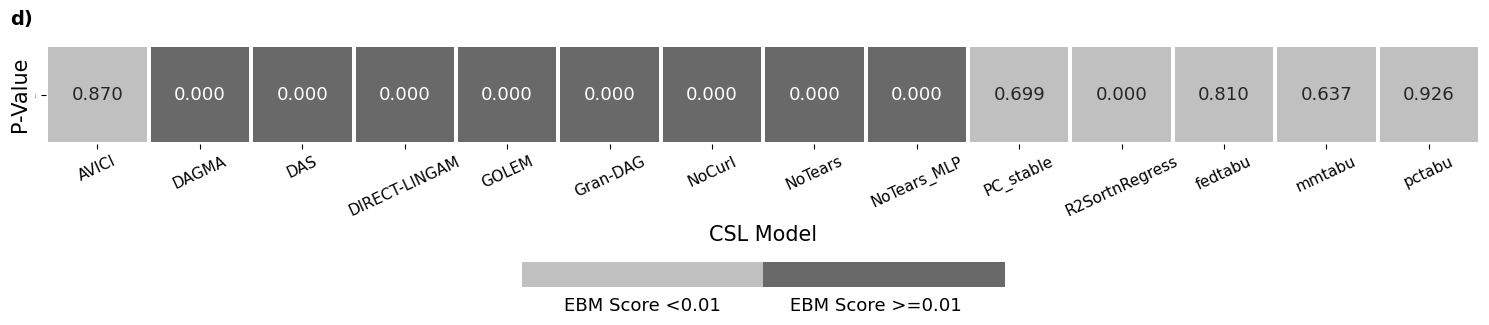

	Figure Caption: a) Heatmap of EBM scores for scales colored based on condition >=0.01 or <0.01, 
 			 b) & c) Significant and insignificant variation in DOS w.r.t. data scale, 
 			 d) Heatmap of p-values from T-test for independence colored based on EBM scores from a).


In [8]:
print('Selection of EBM Threshold:')
results_visualization.plot_appendix_ebm_threshold()

Differences in avg. DOS when changes to the data scale are performed:


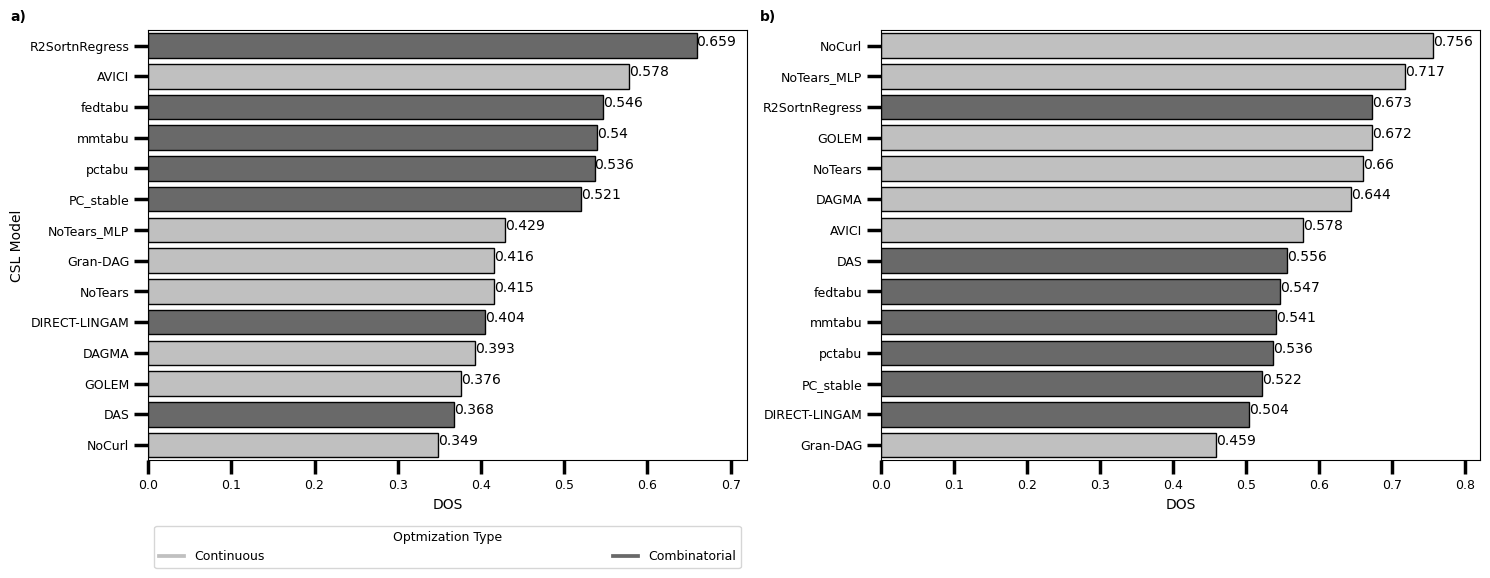

	Figure Caption: a) & b) Achieved DOS values on average on standardized and original scale.


In [6]:
print('Differences in avg. DOS when changes to the data scale are performed:')
results_visualization.plot_appendix_ranking()

In [1]:
#!pip install avici
#AVICI PLASMA delete:


**CODE FOR MATCHING RESULTS & EVALUATIONS**

a) ER graphs:

In [2]:
#Map the above results with the results from the bayesian networks:
file_path_first='C:/Users/Georg Velev/Desktop/Humboldt Uni/CSL_Benchmark_Study/Exported_from_HU/Not_Aggregated/Raw_Nodes_Results/Six_Dimensional_DOS_Results/'

with open(file_path_first+'ER_CSL_Results_Evaluation.pkl','rb') as f:
    er_results_evaluation=pickle.load(f)

with open(file_path_first+'ER_BN_CSL_Results_Evaluation.pkl','rb') as f:
    bn_er_results_evaluation=pickle.load(f)

In [64]:
for sample_size in ['Large_Sample_Size','Small_Sample_Size']:
    for nr_nodes in [10,20,50,100]:
        mmtabu_fedtabu_er_items=bn_er_results_evaluation['MMTABU_FEDTABU'][sample_size][nr_nodes]
        pctabu_er_items=bn_er_results_evaluation['PCTABU'][sample_size][nr_nodes]
        other_er_items=er_results_evaluation[sample_size][str(nr_nodes)+'_nodes']
        
        for idx in range(0,len(mmtabu_fedtabu_er_items)):
            #Convert column names to integers:
            cols_array=[int(col) for col in mmtabu_fedtabu_er_items[idx]['dataset'].columns]
            mmtabu_fedtabu_er_items[idx]['dataset'].columns=cols_array
            #Convert row names to integers:
            indices=[int(index_value) for index_value in mmtabu_fedtabu_er_items[idx]['dataset'].index]
            mmtabu_fedtabu_er_items[idx]['dataset'].index=indices
            
            #Convert column names to integers:
            cols_array=[int(col) for col in pctabu_er_items[idx]['dataset'].columns]
            pctabu_er_items[idx]['dataset'].columns=cols_array
            #Convert row names to integers:
            indices=[int(index_value) for index_value in pctabu_er_items[idx]['dataset'].index]
            pctabu_er_items[idx]['dataset'].index=indices
            
            dataframe_comparison=mmtabu_fedtabu_er_items[idx]['dataset'].equals(other_er_items[idx][3])
            if dataframe_comparison==False:
                print('Mismatch between FEDTABU & MMTABU vs. all Other Found at Index: ', idx)
            else:
                current_fedtabu_estimation=mmtabu_fedtabu_er_items[idx]['feddag_est_bge']['estimated_causal_adjacency_tabu']
                other_er_items[idx][-2]['fedtbau']=current_fedtabu_estimation
                current_fedtabu_evaluation=mmtabu_fedtabu_er_items[idx]['Performance_Evaluation']['feddag_est_bge']['TABU']
                other_er_items[idx][-1]['fedtabu']=current_fedtabu_evaluation
                
                current_mmtabu_estimation=mmtabu_fedtabu_er_items[idx]['mmdag_est_bge']['estimated_causal_adjacency_tabu']
                other_er_items[idx][-2]['mmtabu']=current_mmtabu_estimation
                current_mmtabu_evaluation=mmtabu_fedtabu_er_items[idx]['Performance_Evaluation']['mmdag_est_bge']['TABU']
                other_er_items[idx][-1]['mmtabu']=current_mmtabu_evaluation
                
            dataframe_comparison=pctabu_er_items[idx]['dataset'].equals(other_er_items[idx][3])
            if dataframe_comparison==False:
                print('Mismatch between PCTABU vs. all Other Found at Index: ', idx)
            else:
                current_pctabu_estimation=pctabu_er_items[idx]['pcdag_est_bge']['estimated_causal_adjacency_tabu']
                other_er_items[idx][-2]['pctbau']=current_pctabu_estimation
                current_pctabu_evaluation=pctabu_er_items[idx]['Performance_Evaluation']['pcdag_est_bge']['TABU']
                other_er_items[idx][-1]['pctabu']=current_pctabu_evaluation
                

Save results + evaluation:

In [72]:
with open('../Performance_Evaluation_Framework/Results/ER_CSL_Results_Evaluation.pkl','wb') as f:
    pickle.dump(er_results_evaluation,f)

Save results only:

In [74]:
er_res=er_results_evaluation.copy()
for sample_size in ['Large_Sample_Size','Small_Sample_Size']:
    for nr_nodes in [10,20,50,100]:
        er_res_items=er_res[sample_size][str(nr_nodes)+'_nodes']
        for idx in range(0,len(er_res_items)):
            er_res_items[idx]=er_res_items[idx][:-1]

In [77]:
with open('../Performance_Evaluation_Framework/Results/ER_CSL_Results.pkl','wb') as f:
    pickle.dump(er_res,f)

b) SF graphs:

In [2]:
#Map the above results with the results from the bayesian networks:
file_path_first='C:/Users/Georg Velev/Desktop/Humboldt Uni/CSL_Benchmark_Study/Exported_from_HU/Not_Aggregated/Raw_Nodes_Results/Six_Dimensional_DOS_Results/'

with open(file_path_first+'SF_CSL_Results_Evaluation.pkl','rb') as f:
    sf_results_evaluation=pickle.load(f)

with open(file_path_first+'SF_BN_CSL_Results_Evaluation.pkl','rb') as f:
    bn_sf_results_evaluation=pickle.load(f)

In [12]:
for sample_size in ['Large_Sample_Size','Small_Sample_Size']:
    for nr_nodes in [10,20,50,100]:
        mmtabu_fedtabu_sf_items=bn_sf_results_evaluation['MMTABU_FEDTABU'][sample_size][nr_nodes]
        pctabu_sf_items=bn_sf_results_evaluation['PCTABU'][sample_size][nr_nodes]
        other_sf_items=sf_results_evaluation[sample_size][str(nr_nodes)+'_nodes']
        
        for idx in range(0,len(mmtabu_fedtabu_sf_items)):
            #Convert column names to integers:
            cols_array=[int(col) for col in mmtabu_fedtabu_sf_items[idx]['dataset'].columns]
            mmtabu_fedtabu_sf_items[idx]['dataset'].columns=cols_array
            #Convert row names to integers:
            indices=[int(index_value) for index_value in mmtabu_fedtabu_sf_items[idx]['dataset'].index]
            mmtabu_fedtabu_sf_items[idx]['dataset'].index=indices
            
            #Convert column names to integers:
            cols_array=[int(col) for col in pctabu_sf_items[idx]['dataset'].columns]
            pctabu_sf_items[idx]['dataset'].columns=cols_array
            #Convert row names to integers:
            indices=[int(index_value) for index_value in pctabu_sf_items[idx]['dataset'].index]
            pctabu_sf_items[idx]['dataset'].index=indices
            
            dataframe_comparison=mmtabu_fedtabu_sf_items[idx]['dataset'].equals(other_sf_items[idx][3])
            if dataframe_comparison==False:
                print('Mismatch between FEDTABU & MMTABU vs. all Other Found at Index: ', idx)
            else:
                current_fedtabu_estimation=mmtabu_fedtabu_sf_items[idx]['feddag_est_bge']['estimated_causal_adjacency_tabu']
                other_sf_items[idx][-2]['fedtbau']=current_fedtabu_estimation
                current_fedtabu_evaluation=mmtabu_fedtabu_sf_items[idx]['Performance_Evaluation']['feddag_est_bge']['TABU']
                other_sf_items[idx][-1]['fedtabu']=current_fedtabu_evaluation
                
                current_mmtabu_estimation=mmtabu_fedtabu_sf_items[idx]['mmdag_est_bge']['estimated_causal_adjacency_tabu']
                other_sf_items[idx][-2]['mmtabu']=current_mmtabu_estimation
                current_mmtabu_evaluation=mmtabu_fedtabu_sf_items[idx]['Performance_Evaluation']['mmdag_est_bge']['TABU']
                other_sf_items[idx][-1]['mmtabu']=current_mmtabu_evaluation
                
            dataframe_comparison=pctabu_sf_items[idx]['dataset'].equals(other_sf_items[idx][3])
            if dataframe_comparison==False:
                print('Mismatch between PCTABU vs. all Other Found at Index: ', idx)
            else:
                current_pctabu_estimation=pctabu_sf_items[idx]['pcdag_est_bge']['estimated_causal_adjacency_tabu']
                other_sf_items[idx][-2]['pctbau']=current_pctabu_estimation
                current_pctabu_evaluation=pctabu_sf_items[idx]['Performance_Evaluation']['pcdag_est_bge']['TABU']
                other_sf_items[idx][-1]['pctabu']=current_pctabu_evaluation
                

In [14]:
with open('../Performance_Evaluation_Framework/Results/SF_CSL_Results_Evaluation.pkl','wb') as f:
    pickle.dump(sf_results_evaluation,f)

In [15]:
sf_res=sf_results_evaluation.copy()
for sample_size in ['Large_Sample_Size','Small_Sample_Size']:
    for nr_nodes in [10,20,50,100]:
        sf_res_items=sf_res[sample_size][str(nr_nodes)+'_nodes']
        for idx in range(0,len(sf_res_items)):
            sf_res_items[idx]=sf_res_items[idx][:-1]

In [18]:
with open('../Performance_Evaluation_Framework/Results/SF_CSL_Results.pkl','wb') as f:
    pickle.dump(sf_res,f)

To-Do: eliminate the entries related to noise std. and varsortability, add only to er graph -based simulations graph type at the end of the dataset description